In [1]:
import sys
sys.path.insert(0, "/gpfs/home/lmb529/ruggleslabHome/hypercluster/")
import hypercluster as hc

# Imports

In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib
import sklearn, umap
# import hypercluster as hc
sns.set(style = 'white', color_codes=True, font_scale = 1.3)
matplotlib.rcParams.update({'savefig.bbox': 'tight', 'savefig.dpi': '500'})

### Input data and filtering

In [3]:
data = pd.read_csv('../../hypercluster_supp/TCGA_2012_BRCA_data_expression_median.txt', sep='\t', index_col=[0,1]).reset_index(level=1, drop=True).transpose()
data = data.dropna(how='any', axis=1)

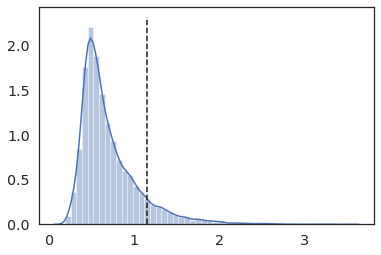

In [4]:
stdev_cut = np.nanquantile(data.std(), 0.9)
ax = sns.distplot(data.std().dropna())
plt.plot([stdev_cut, stdev_cut], ax.get_ylim(), 'k--')

In [5]:
data = data.loc[:, data.std()>stdev_cut]

In [6]:
data.shape

(526, 1681)

# Running with default hyperparameters

In [9]:
custom_metrics = [
    'largest_cluster_size',
    'number_clustered',
    'number_of_clusters',
    'smallest_cluster_ratio',
    'smallest_cluster_size',
    'smallest_largest_clusters_ratio'
]
evals, labels, labels_dict = hc.clustering.optimize_clustering(data, random_search=False, evaluation_methods=hc.constants.inherent_metrics+custom_metrics)

ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not have at least two clusters, skipping
ERROR:root:Condition HDBSCAN;min_cluster_size-8 does not hav

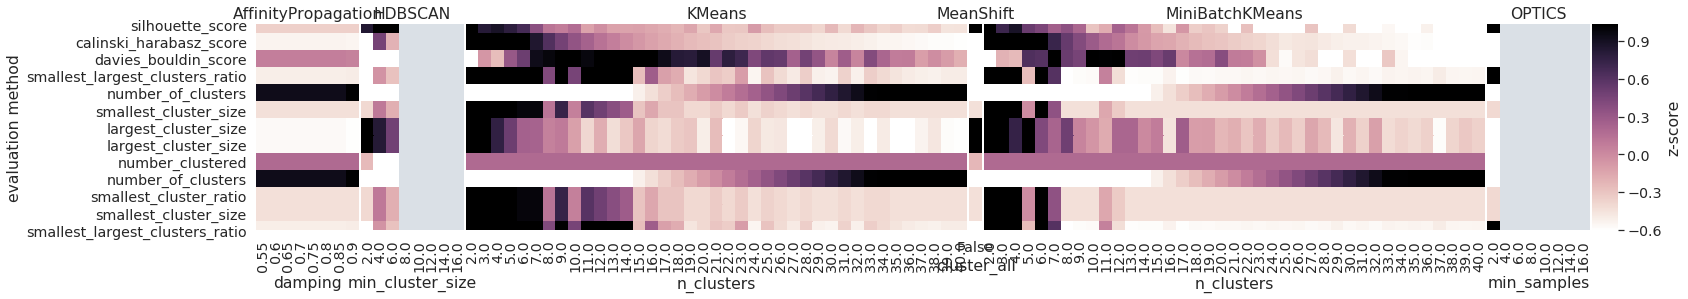

In [10]:
axs = hc.visualize.visualize_evaluations(evals)

In [17]:
evals = evals.loc[:,evals.loc['number_clustered']==evals.loc['number_clustered'].max()]

In [18]:
best_labels = hc.clustering.pick_best_labels(evals, labels)

In [22]:
col_colors = best_labels[best_labels.columns[0]].replace({clus: sns.color_palette().as_hex()[i] for i, clus in enumerate(best_labels[best_labels.columns[0]].unique())})

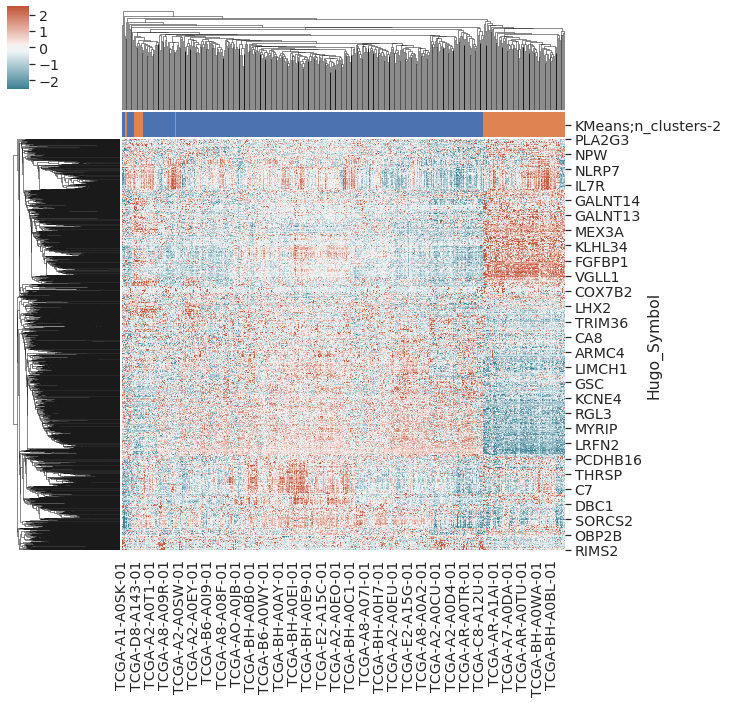

In [29]:
sns.clustermap(hc.visualize.zscore(data.transpose()), col_colors=col_colors, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), vmin=-2.5, vmax=2.5)

# Choosing custom hyperparameters to optimize

# Adding probability weights to each parameter for random search

# Predicting on new data

# Visualizing results